## Regresja liniowa

### Wczytanie bibliotek i danych

Wymagane biblioteki:
- pandas (pip install pandas)
- sklearn (pip install scikit-learn)
- matplotlib (pip install matplotlib)
- numpy (pip install numpy)

In [60]:
### Importowanie bibliotek

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression


### Wczytanie danych

df = pd.read_csv('example1.csv')

print(df.head())
print(df.shape)

   X    Y
0  0 -1.0
1  1  1.2
2  2  2.5
3  3  3.1
4  4  4.3
(11, 2)


### Graficzna reprezentacja

[[ 0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]] [-1.   1.2  2.5  3.1  4.3  5.1  6.7  7.1  9.4 12.  13. ]


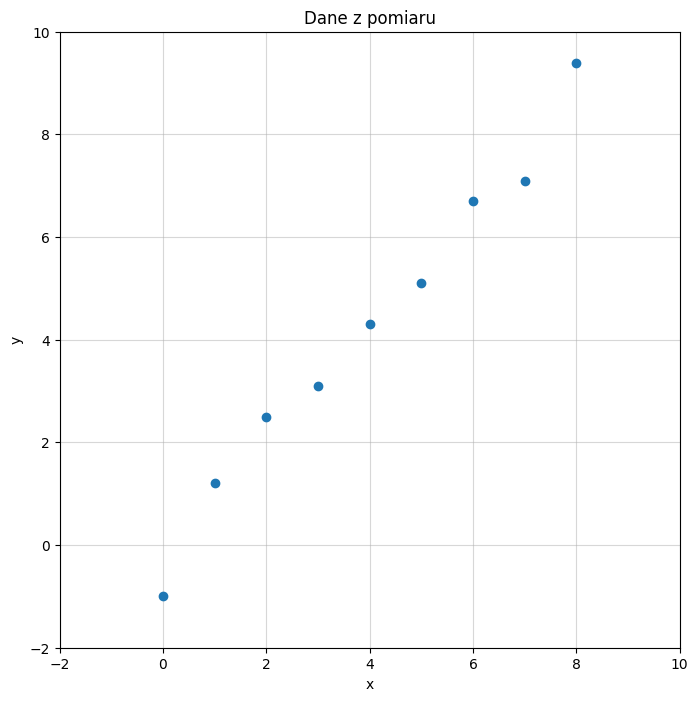

In [61]:
# X = []
# for i in df['X']:
#     X.append([i])
# Y = list(df['Y'])


X = np.single(df['X'])
Y = np.single(df['Y'])

X.shape = (-1,1) # odwracanie wektora X (zmiana wymiarów z poziomego na pionowy)

print(X,Y)

plt.figure(figsize=[8,8], facecolor="white")

plt.title("Dane z pomiaru")
plt.xlabel('x')
plt.ylabel("y")
plt.axis([-2,10,-2,10])
plt.grid(True,which="both",axis="both",alpha=.5)
plt.plot(X,Y,'o')
plt.show()

### Wyznaczanie parametrów (współczynników) prostej, która najlepiej pokrywa się z punktami w całym zakresie

In [62]:
model = LinearRegression().fit(X,Y)

print(model.coef_)
print(model.intercept_)
a = model.coef_[0]
b = model.intercept_

print(f"Wynikiem jest prosta o równaniu y = {a:.3f} {b:+.3f}")

[1.311818]
-0.79545355
Wynikiem jest prosta o równaniu y = 1.312 -0.795


### Wykres danych i prostej wyznaczonej w procesie regresji liniowej

Wynik dopasowania: 97.55%


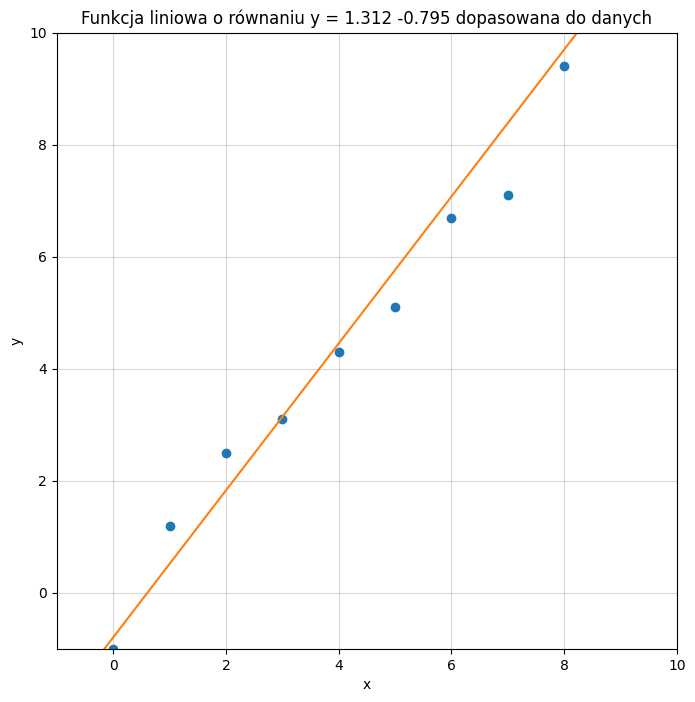

In [63]:
# X = np.arange(-10,10) # 
x_test = np.single(range(-10,10))
x_test.shape = (-1,1)

y_predict = model.predict(x_test)
print(f"Wynik dopasowania: {100*model.score(X,Y):.2f}%")

plt.figure(figsize=[8,8], facecolor="white")
plt.title(f'Funkcja liniowa o równaniu y = {a:.3f} {b:+.3f} dopasowana do danych')

plt.xlabel('x')
plt.ylabel("y")
plt.axis([-1,10,-1,10])
plt.grid(True,which="both",axis="both",alpha=.5)
plt.plot(X,Y,'o')
plt.plot(x_test,y_predict,'-')
plt.show()


## Regresja wielomianowa

### Wczytanie bibliotek i danych

Wymagane biblioteki:
- pandas (pip install pandas)
- sklearn (pip install scikit-learn)
- matplotlib (pip install matplotlib)
- numpy (pip install numpy)

In [68]:
### Importowanie bibliotek

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

### Wczytanie danych

df = pd.read_csv("example2.csv",delimiter=";", decimal=",")

print(df.head())
print(df.shape)

          x           y
0  0.709097   -2.037914
1 -0.670961    8.435518
2 -9.898163  160.838122
3 -0.298403   11.536360
4 -7.837417  115.868324
(250, 2)


### Graficzna reprezentacja

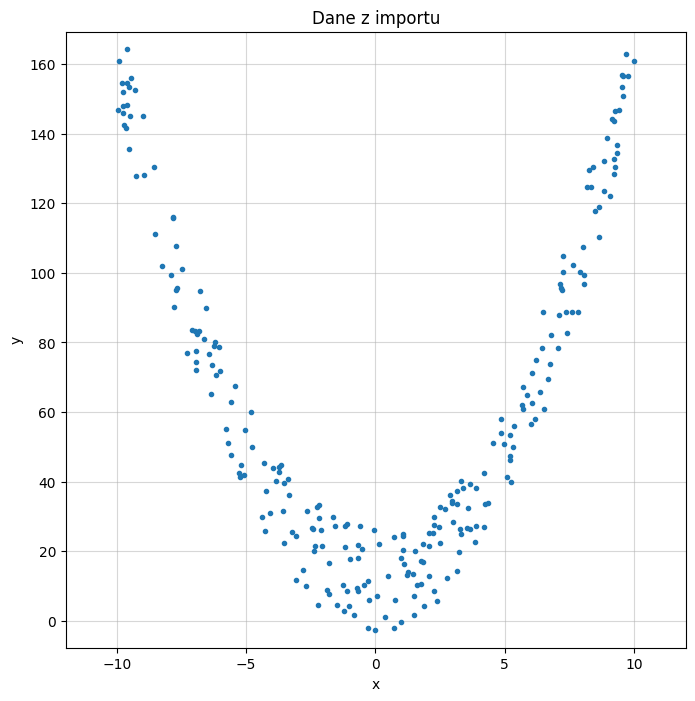

In [69]:

X = np.single(df['x'])
X.shape = (-1,1)
Y = np.single(df['y'])

plt.figure(figsize=[8,8], facecolor="white")
plt.title("Dane z importu")

plt.xlabel('x')
plt.ylabel("y")
plt.axis([X.min()-2,X.max()+2,Y.min()-5,Y.max()+5])
plt.grid(True,which="both",axis="both",alpha=.5)
plt.plot(X,Y,'.')
plt.show()

Wynik dopasowania: 96.72%
[ 0.         -0.26009083  1.4816607   0.00421297] 12.483242


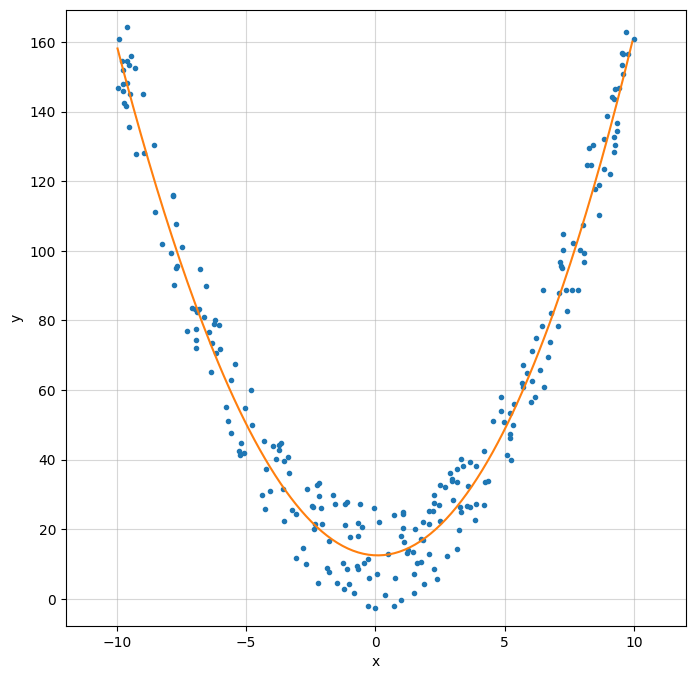

In [70]:
pf = PolynomialFeatures(3)
x_trans = pf.fit_transform(X)

model = LinearRegression().fit(x_trans,Y)

print(f"Wynik dopasowania: {100*model.score(x_trans,Y):.2f}%")
print(model.coef_, model.intercept_)

x_test = np.arange(X.min(),X.max(),0.1)
x_test.shape = (-1,1)

plt.figure(figsize=[8,8], facecolor="white")
plt.plot(X,Y,'.')
plt.plot(x_test,model.predict(pf.fit_transform(x_test)),'-')
plt.xlabel('x')
plt.ylabel("y")
plt.axis([X.min()-2,X.max()+2,Y.min()-5,Y.max()+5])
plt.grid(True,which="both",axis="both",alpha=.5)
plt.show()

Wynik dopasowania do danych treningowych: 96.38%
Wynik dopasowania do danych testowych: 97.17%
Wynik dopasowania do wszystkich danych: 96.68%
[ 0.0000000e+00 -1.4624910e-02  1.5011772e+00 -1.2907129e-03
  7.7307370e-05  1.5935782e-05] 11.764324


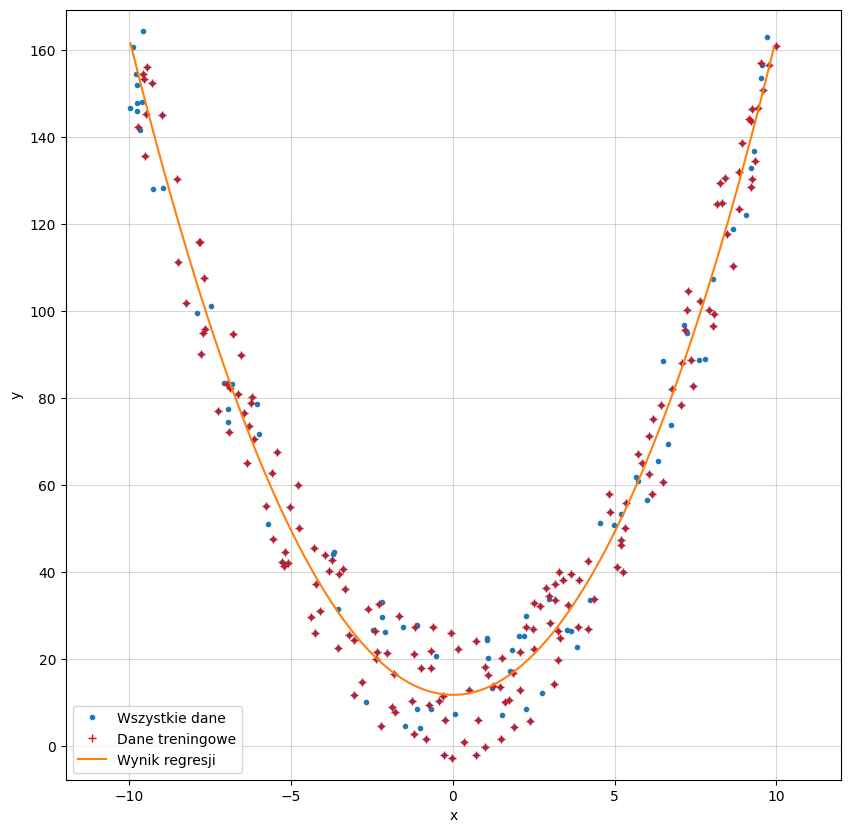

In [75]:
from sklearn.model_selection import train_test_split
# Podział na zestaw treningowy (70%) i testowy (30%)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3) #, random_state=12

pf = PolynomialFeatures(5)
x_train_trans = pf.fit_transform(X_train)
x_test_trans = pf.fit_transform(X_test)
x_trans = pf.transform(X)

model = LinearRegression().fit(x_train_trans,y_train)

print(f"Wynik dopasowania do danych treningowych: {100*model.score(x_train_trans,y_train):.2f}%")
print(f"Wynik dopasowania do danych testowych: {100*model.score(x_test_trans,y_test):.2f}%")
print(f"Wynik dopasowania do wszystkich danych: {100*model.score(x_trans,Y):.2f}%")



print(model.coef_, model.intercept_)

x_test = np.arange(X.min(),X.max(),0.1)
x_test.shape = (-1,1)

plt.figure(figsize=[10,10], facecolor="white")
plt.plot(X,Y,'.')
plt.plot(X_train,y_train,'r+')
plt.plot(x_test,model.predict(pf.fit_transform(x_test)),'-')
plt.legend(["Wszystkie dane","Dane treningowe","Wynik regresji"])
plt.xlabel('x')
plt.ylabel("y")
plt.axis([X.min()-2,X.max()+2,Y.min()-5,Y.max()+5])
plt.grid(True,which="both",axis="both",alpha=.5)
plt.show()